# Notebook 3: Linear Regression

## Objectives
By the end of this notebook, you will be able to:
1.  **Understand Linear Regression**: The relationship between variables.
2.  **Fit Models**: Use `statsmodels` and `scikit-learn`.
3.  **Interpret Results**: Coefficients, R-squared, and P-values.
4.  **Handle Interactions**: When the effect of one variable depends on another.

## Prerequisites
-   Notebook 2 (Hypothesis Testing)
-   Basic plotting skills.


## Part 1: Simple Linear Regression

We try to fit a line: $$ Y = \beta_0 + \beta_1 X + \epsilon $$

*   $\beta_0$: Intercept.
*   $\beta_1$: Slope (change in Y for 1 unit change in X).
*   $\epsilon$: Error term.


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           9.18e-36
Time:                        02:29:02   Log-Likelihood:                -489.32
No. Observations:                 200   AIC:                             982.6
Df Residuals:                     198   BIC:                             989.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1425      0.421     19.349      0.0

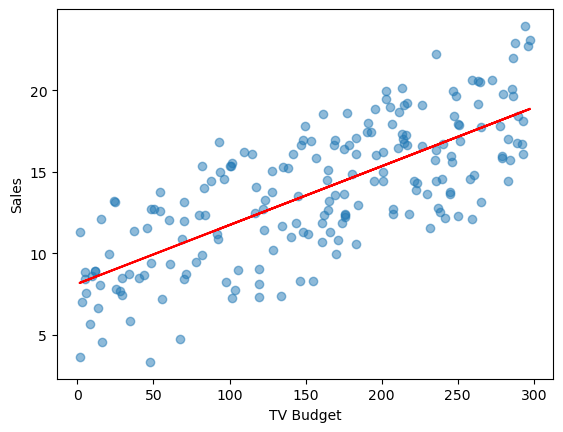

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load Advertising Data (simulated)
data = {
    'TV': np.random.uniform(0, 300, 200),
    'Radio': np.random.uniform(0, 50, 200),
    'Newspaper': np.random.uniform(0, 100, 200)
}
# Sales = 2.9 + 0.04*TV + 0.18*Radio + Noise
data['Sales'] = 2.9 + 0.04 * data['TV'] + 0.18 * data['Radio'] + np.random.normal(0, 1, 200)
df = pd.DataFrame(data)

# Fit Model
model = smf.ols('Sales ~ TV', data=df).fit()
print(model.summary())

# Plot
plt.scatter(df['TV'], df['Sales'], alpha=0.5)
plt.plot(df['TV'], model.predict(df['TV']), color='red')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.show()


## Part 2: Multiple Regression

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... $$

### Interactions
Sometimes, the effect of TV on Sales depends on how much Radio we use. We add an interaction term:
$$ Sales \approx TV + Radio + (TV \times Radio) $$


In [2]:
# Fit Model with Interaction
model_inter = smf.ols('Sales ~ TV * Radio', data=df).fit()
print(model_inter.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):          3.23e-122
Time:                        02:29:02   Log-Likelihood:                -280.32
No. Observations:                 200   AIC:                             568.6
Df Residuals:                     196   BIC:                             581.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1996      0.320      9.992      0.0

## Exercises

### Task 1: Predict Sales
1.  Use the `model_inter` to predict Sales for a budget of TV=100 and Radio=20.

### Task 2: Scikit-Learn Implementation
1.  Fit a Linear Regression model using `sklearn.linear_model.LinearRegression`.
2.  Compare the coefficients with `statsmodels`.


In [3]:
# --- SOLUTION TASK 1 ---
new_data = pd.DataFrame({'TV': [100], 'Radio': [20]})
pred = model_inter.predict(new_data)
print(f"Predicted Sales: {pred[0]:.2f}")

# --- SOLUTION TASK 2 ---
from sklearn.linear_model import LinearRegression
X = df[['TV', 'Radio']]
# Note: sklearn doesn't automatically add interaction terms, we'd need to create them manually
# For simple comparison, let's just fit TV and Radio
lm = LinearRegression()
lm.fit(X, df['Sales'])
print(f"Sklearn Coeffs: {lm.coef_}")
print(f"Sklearn Intercept: {lm.intercept_}")


Predicted Sales: 10.55


Sklearn Coeffs: [0.03928454 0.18323454]
Sklearn Intercept: 2.931006410178961


## Industry Best Practices

### Statsmodels vs Scikit-Learn
*   **Statsmodels**: Best for **inference** (understanding relationships, p-values, confidence intervals).
*   **Scikit-Learn**: Best for **prediction** and building machine learning pipelines.

### Pipelines
In production, use pipelines to handle preprocessing (scaling, encoding) and modeling together.
```python
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(), LinearRegression())
```
